In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import preprocess_input
#from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'D:/sem7/sgp/train'
valid_path = 'D:/sem7/sgp/val'

In [4]:
# add preprocessing layer to the front of ResNet50
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('D:/sem7/sgp/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2601 images belonging to 10 classes.
Found 657 images belonging to 10 classes.


In [12]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
82/82 [==============================] - 444s 5s/step - loss: 3.1912 - accuracy: 0.3672 - val_loss: 2.0410 - val_accuracy: 0.4962
Epoch 2/5
82/82 [==============================] - 440s 5s/step - loss: 1.5397 - accuracy: 0.5440 - val_loss: 1.4767 - val_accuracy: 0.5373
Epoch 3/5
82/82 [==============================] - 461s 6s/step - loss: 1.0820 - accuracy: 0.6578 - val_loss: 1.3612 - val_accuracy: 0.5738
Epoch 4/5
82/82 [==============================] - 459s 6s/step - loss: 1.0143 - accuracy: 0.6786 - val_loss: 0.8519 - val_accuracy: 0.7291
Epoch 5/5
82/82 [==============================] - 433s 5s/step - loss: 0.9488 - accuracy: 0.7109 - val_loss: 0.9664 - val_accuracy: 0.7093


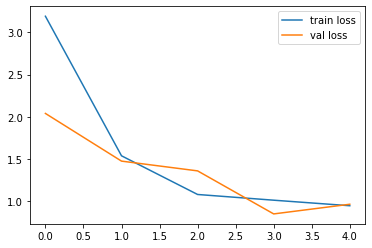

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

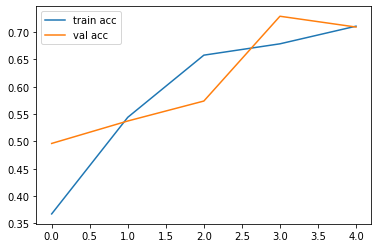

<Figure size 432x288 with 0 Axes>

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('output/resnet50_model.h5')